**Preparation part and the Package Loading**

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#!pip3 install seaborn==0.9.0

In [0]:
pwd = '/content/drive/My Drive/Colab Notebooks/data visualization/data/Acumen_Data.csv'
base = '/content/drive/My Drive/Colab Notebooks/data visualization/data/'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb # Pcakge used to do statistical visualization
import os

In [5]:
# Read data
dat = pd.read_csv(pwd)
# Show First 10 rows
dat.head(10)

,Observation Number,Quarter,Employee Id,Sex (Male=1),Race,Age,Hospital Visit This Quarter (1=Yes),Salary,Health Score
0,1,1,1,0.0,3.0,27,0,36906.57,3.7
1,2,2,1,0.0,3.0,28,0,37906.57,5.0
2,3,3,1,0.0,3.0,28,0,38906.57,4.0
3,4,4,1,0.0,3.0,28,0,39906.57,2.3
4,5,5,1,0.0,3.0,29,0,40906.57,2.1
5,6,6,1,0.0,3.0,29,0,41906.57,1.5
6,7,7,1,0.0,3.0,29,0,42906.57,4.7
7,8,8,1,0.0,3.0,29,0,43906.57,2.3
8,9,9,1,0.0,3.0,30,0,44906.57,2.8
9,10,10,1,0.0,3.0,30,0,45906.57,2.8


In [0]:
# Function used to print out the missing value information in a dataframe
def missing_num(dat):
    print('total rows number: ',len(dat))
    print('total rows contain NaN: ',dat.isnull().T.any().T.sum())
    col_names = list(dat.columns.values)
    for name in col_names:
        print('total number of NaN in the column ',\
              name,' : ',dat[name].isnull().sum())

In [0]:
# Function used to plot out the Countplots
def count_plot(dat,col_name,ax_i,H=None,sort=False,font_size=10):
  if sort:
      ax = sb.countplot(x=col_name,data=dat,order=dat[col_name].\
                        value_counts().index.sort_values(),ax=ax_i)
  else:
      ax = sb.countplot(x=col_name,hue=H,data=dat,ax=ax_i)
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=font_size)
  ax.set_title('Count plot of '+col_name)
  rects = ax.patches
  labels = dat[col_name].value_counts().values
  for rect, label in zip(rects, labels):
      height = rect.get_height()
      ax.text(rect.get_x() + rect.get_width()/2, height + 5,\
              label, ha='center', va='bottom')

In [8]:
# Show the Missing Value summary
print('The Missing Value Report:')
missing_num(dat)

# Show the Summary Statistics for each column
summary = dat.describe()
summary = summary.transpose()
summary

The Missing Value Report:
total rows number:  19103
total rows contain NaN:  2176
total number of NaN in the column  Observation Number  :  0
total number of NaN in the column  Quarter  :  0
total number of NaN in the column  Employee Id  :  0
total number of NaN in the column  Sex (Male=1)  :  71
total number of NaN in the column  Race  :  2123
total number of NaN in the column  Age  :  0
total number of NaN in the column  Hospital Visit This Quarter (1=Yes)  :  0
total number of NaN in the column  Salary  :  0
total number of NaN in the column  Health Score  :  0


,count,mean,std,min,25%,50%,75%,max
Observation Number,19103.0,9552.000000,5514.705432,1.0,4776.50,9552.00,14327.50,19103.00
Quarter,19103.0,7.342826,3.166792,1.0,5.00,8.00,10.00,12.00
Employee Id,19103.0,998.012249,577.313902,1.0,498.00,996.00,1498.00,2000.00
Sex (Male=1),19032.0,0.506305,0.499973,0.0,0.00,1.00,1.00,1.00
Race,16980.0,1.597055,0.739656,1.0,1.00,1.00,2.00,3.00
Age,19103.0,30.592263,7.018862,7.0,26.00,29.00,32.00,172.00
Hospital Visit This Quarter (1=Yes),19103.0,0.111448,0.314695,0.0,0.00,0.00,0.00,1.00
Salary,19103.0,48297.597961,5351.302344,28350.7,44550.71,48196.08,51958.41,68826.34
Health Score,19103.0,3.588379,1.985285,0.6,2.40,3.10,4.10,10.00


The whole dataset has the missing values. The 'Sex' coloumn has 71 missing values and the 'Race' column has 2123 missing values.

Not all the values in the dataset are reasonable. The most irreasonable value is in the 'Age' column. We could see that the maximum value in the 'Age' column is 172, which is not possible for a human being. We would need to check if this is just one employee or there are more employees with irreasonable ages.

In [9]:
# Number of Employees
emp_id = list(set(dat['Employee Id'].values))
num_emp = len(emp_id)
print('Number of Employees in Company A: ',num_emp)

# Find out the age of each employee
ages = []
for i in range(num_emp):
    ages.append(dat.loc[dat['Employee Id']==emp_id[i]]['Age'].values[-1])

ages.sort(reverse=True)
print('The Max age: ',ages[0],' the second max age: ',ages[1])

Number of Employees in Company A:  1962
The Max age:  172  the second max age:  72


There are 1962 unique employees in total. It is confirmed that only one employee has the irreasonable age as 172. The other ages are reasonable. As a result, we would want to drop this employee from the original dataset.

In [0]:
# Drop the 172 age employee
outlier_emp_id = dat[dat['Age']==172]['Employee Id'].values[0]
outlier_idx = dat[dat['Employee Id']==outlier_emp_id].index
dat = dat.drop(outlier_idx)

In [11]:
# Number of Employees
emp_id = list(set(dat['Employee Id'].values))
num_emp = len(emp_id)
print('Number of Employees in Company A: ',num_emp)

# Number of Hospitals Each
num_hosp_record = len(dat.loc[dat['Hospital Visit This Quarter (1=Yes)']==1])
print('Total Record of Going to Hospital: ', num_hosp_record)

num_emp_hosp = []
sexs = []
races = []
ages = []
salary_mean = []
salary_change = []
for i in range(num_emp):
    num_emp_hosp.append(sum(dat.loc[dat['Employee Id']==emp_id[i]]\
                               ['Hospital Visit This Quarter (1=Yes)'].values))
    sexs.append(dat.loc[dat['Employee Id']==emp_id[i]]['Sex (Male=1)'].values[0])
    races.append(dat.loc[dat['Employee Id']==emp_id[i]]['Race'].values[0])
    ages.append(dat.loc[dat['Employee Id']==emp_id[i]]['Age'].values[-1])
    salary_mean.append(np.mean(dat.loc[dat['Employee Id']\
                                       ==emp_id[i]]['Salary'].values))
    salary_change.append(dat.loc[dat['Employee Id']==emp_id[i]]\
                         ['Salary'].values[-1]\
                         -dat.loc[dat['Employee Id']==emp_id[i]]\
                         ['Salary'].values[0])

subtable1 = pd.DataFrame({'Employee ID':emp_id,\
                          'Sex': sexs,\
                          'Races': races,\
                          'Ages': ages,\
                          'Mean Salary': salary_mean,\
                          'Change of Salary': salary_change,\
                          'Total Quarters Go To Hospital':num_emp_hosp})

Number of Employees in Company A:  1961
Total Record of Going to Hospital:  2129


Now the total number of employees is 1961 and the total number of record that employees went to the hospital is 2129.

posx and posy should be finite values
posx and posy should be finite values


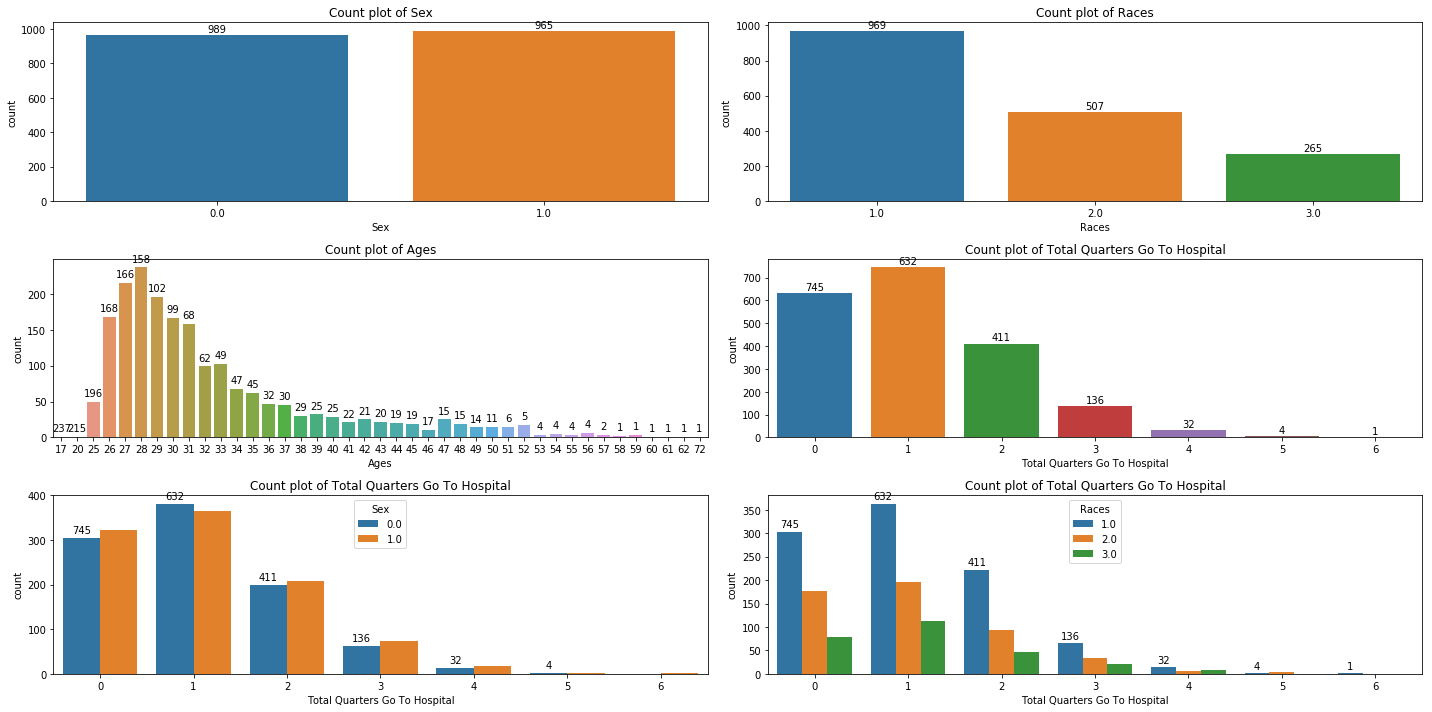

In [12]:
# Plot out several countplots for several columns
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
count_plot(subtable1,'Sex',ax1)
count_plot(subtable1,'Races',ax2)
count_plot(subtable1,'Ages',ax3)
count_plot(subtable1,'Total Quarters Go To Hospital',ax4)
count_plot(subtable1,'Total Quarters Go To Hospital',ax5,H='Sex')
count_plot(subtable1,'Total Quarters Go To Hospital',ax6,H='Races')
plt.tight_layout()

These count plots above show the information of different columns.

The count plot of the Sex shows that the ratio of the male and female employees are close to 1:1 in the company.

The count plot of the Races shows the ratio of the three races close to 3.8:1.9:1.

The count plot of the Ages (Here are the ages of the last quarter for each employee) shows a right skewed distribution. Most of the employees have ages from 26 to 31. We could see that there are several very young employees and some very old employees.

The count plot of total quarters employees going to hospital shows that 632 employees never go to the hospital in all the quarters. 745 employees only went to hospital in one quarter. There are a few people went to hospital for more than 3 quarters.

The count plot of total quarters employees going to hospital respect to the Sex and Races shows that there isn't a big difference among different sex groups or different race groups.


Text(0.5, 1.0, 'Violin Plot of Salary in female and male group')

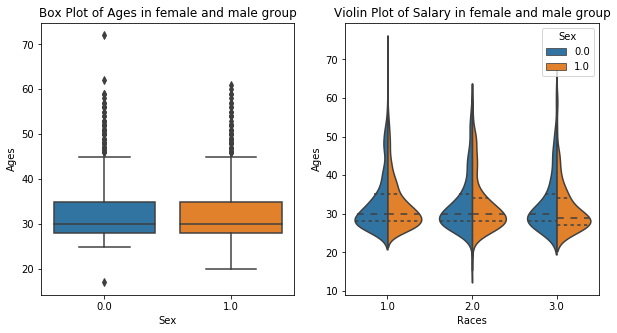

In [13]:
# Box plot and Violin plot for the Ages respect to Sex.
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
p1 = sb.boxplot(x='Sex',y='Ages',data=subtable1,ax=ax1)
p1.set_title('Box Plot of Ages in female and male group')
p2 = sb.violinplot(x='Races',y='Ages',hue='Sex',split=True,\
                   inner="quart",data=subtable1,ax=ax2)
p2.set_title('Violin Plot of Salary in female and male group')

The box plots and the violin plots respect to female and male shows that the ages of employees have almost the same distribution in different Sex groups.

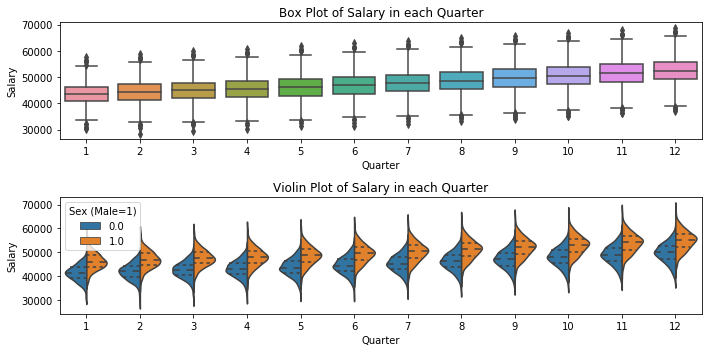

In [14]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
p1 = sb.boxplot(x='Quarter',y='Salary',data=dat,ax=ax1)
p1.set_title('Box Plot of Salary in each Quarter')
p2 = sb.violinplot(x="Quarter", y="Salary",hue='Sex (Male=1)',split=True,\
                   inner="quart",data=dat,ax=ax2)
p2.set_title('Violin Plot of Salary in each Quarter')
plt.tight_layout()

The boxplot shows that employees' salary rise in general every quarter. And we could see that generally the male employees have higher salaries in average.

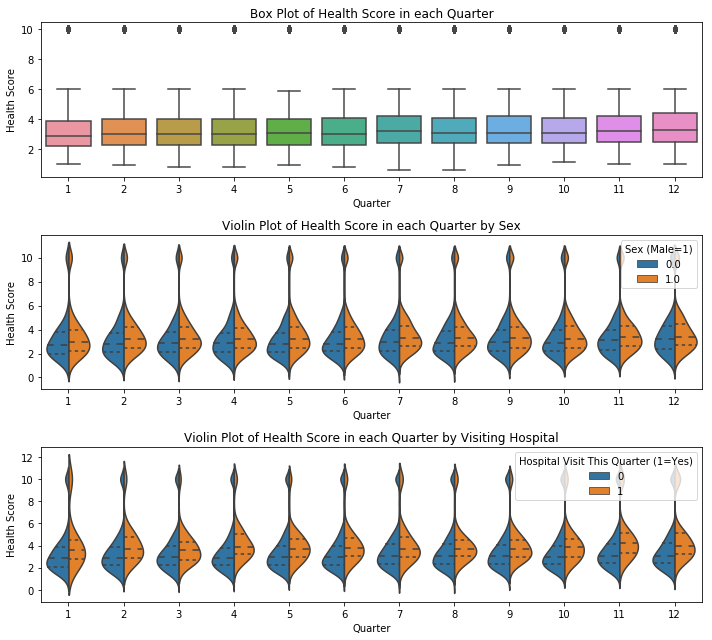

In [15]:
# Boxplot and Violin plot of the Health Score in each quarter
fig = plt.figure(figsize=(10,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
p1 = sb.boxplot(x='Quarter',y='Health Score',data=dat,ax=ax1)
p1.set_title('Box Plot of Health Score in each Quarter')
p2 = sb.violinplot(x="Quarter", y="Health Score",hue='Sex (Male=1)',split=True,\
                   inner="quart",data=dat,ax=ax2)
p2.set_title('Violin Plot of Health Score in each Quarter by Sex')
p3 = sb.violinplot(x="Quarter", y="Health Score",\
                   hue='Hospital Visit This Quarter (1=Yes)',\
                   split=True,inner="quart",data=dat,ax=ax3)
p3.set_title('Violin Plot of Health Score in each Quarter by Visiting Hospital')
plt.tight_layout()

The boxplot shows that there is a slight increase of the health scores by quarters in general.

The first violin plot shows that the averaged health scores in the male group is a little higher than the gemale group.

The second violin plot shows that the averaged health scores in the go-to-hospital group is relatively higher than the not-go-to-hospital group. This difference is clear.

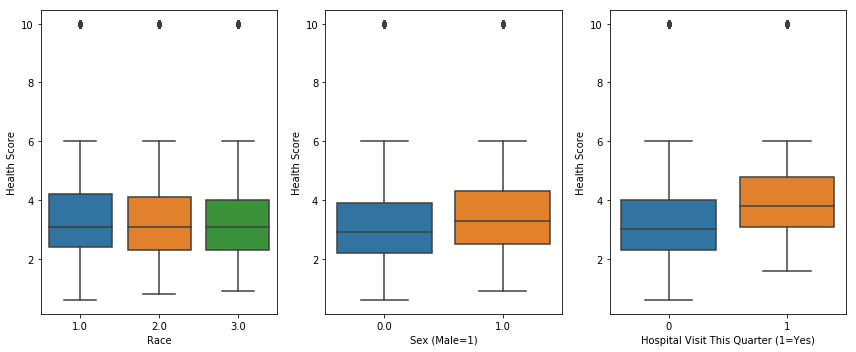

In [24]:
# The Box plot of Health Score respect to Races and Hospital Visit
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sb.boxplot(x='Race',y='Health Score',data=dat,ax=ax1)
sb.boxplot(x='Sex (Male=1)',y='Health Score',data=dat,ax=ax2)
sb.boxplot(x='Hospital Visit This Quarter (1=Yes)',y='Health Score',\
           data=dat,ax=ax3)
plt.tight_layout()

Combine all the health scores and doing the boxplot respect to the Race, the Sex and the Hospital Vist again, we could see that there is not any clear difference among the races. The male group does have a bit higher health scores in general. The go-to-hospital group has a higer score than the not-go-to-hospital group in average with a smaller variance.

In [17]:
# Show the Summary Statistics of Health Score in each quarter.
uniq_quarter = list(set(dat['Quarter']))

q_mean = []
q_std = []
q_25 = []
q_50 = []
q_75 = []
for q in uniq_quarter:
    sub = dat[dat['Quarter']==q]['Health Score']
    summ = sub.describe().transpose()
    q_mean.append(summ[1])
    q_std.append(summ[2])
    q_25.append(summ[4])
    q_50.append(summ[5])
    q_75.append(summ[6])
    print('For the quarter: ',q)
    print(summ)
    print('\n')

For the quarter:  1
count    684.000000
mean       3.427485
std        2.070169
min        1.000000
25%        2.175000
50%        2.900000
75%        3.900000
max       10.000000
Name: Health Score, dtype: float64


For the quarter:  2
count    891.000000
mean       3.485522
std        1.979837
min        0.900000
25%        2.300000
50%        3.000000
75%        4.000000
max       10.000000
Name: Health Score, dtype: float64


For the quarter:  3
count    1139.000000
mean        3.482177
std         1.956187
min         0.800000
25%         2.300000
50%         3.000000
75%         4.000000
max        10.000000
Name: Health Score, dtype: float64


For the quarter:  4
count    1448.000000
mean        3.494199
std         1.958737
min         0.800000
25%         2.300000
50%         3.000000
75%         4.000000
max        10.000000
Name: Health Score, dtype: float64


For the quarter:  5
count    1670.000000
mean        3.484072
std         1.918323
min         0.900000
25%         

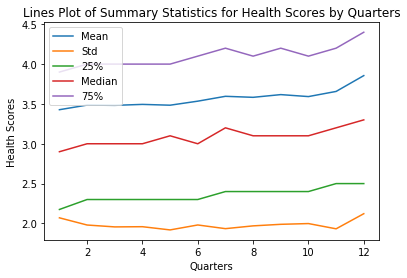

In [18]:
# Line plot of the Summary Statistics for Health Scores by Quarters
plt.plot(uniq_quarter,q_mean,label='Mean')
plt.plot(uniq_quarter,q_std,label='Std')
plt.plot(uniq_quarter,q_25,label='25%')
plt.plot(uniq_quarter,q_50,label='Median')
plt.plot(uniq_quarter,q_75,label='75%')
plt.title('Lines Plot of Summary Statistics for Health Scores by Quarters')
plt.xlabel('Quarters')
plt.ylabel('Health Scores')
plt.legend(loc='upper left')
plt.show()

Not consider any of the other characteristics, the health scores have a increasing trend by the quarter. The standratd deviation does not change a lot during all the years. But all the other statistics increase, which implies the distribution increases respect to the quarters. 

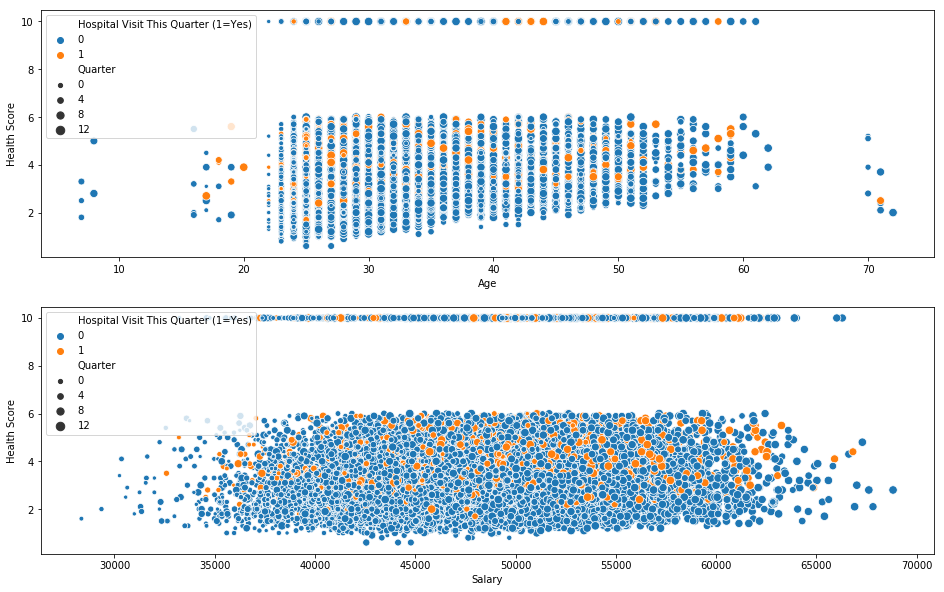

In [20]:
# The scatter plot of the Health Score against Age and the Salary
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
sb.scatterplot(x='Age',y='Health Score',size="Quarter",\
               hue='Hospital Visit This Quarter (1=Yes)',data=dat,ax=ax1)
sb.scatterplot(x='Salary',y='Health Score',size="Quarter",\
               hue='Hospital Visit This Quarter (1=Yes)',data=dat,ax=ax2)

The scatter plot of the Health Score against the Age shows two trend. First is something I've already discussed above that the go-to-hospital group has a averged higher health score. The other trend is that as the age increases, the variance of the health score decreases and the mean of the health score increases.

The scatter plot of the Health Score against the salary does not show a clear relationship between the salary and the health score.